/var/folders/tv/jf353vvs41j02pf_7011gbsm0000gp/T/ipykernel_37197/3346703960.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = cosine_sim_df.applymap(lambda x: f"{x:.2f}" if x != 0 else "")


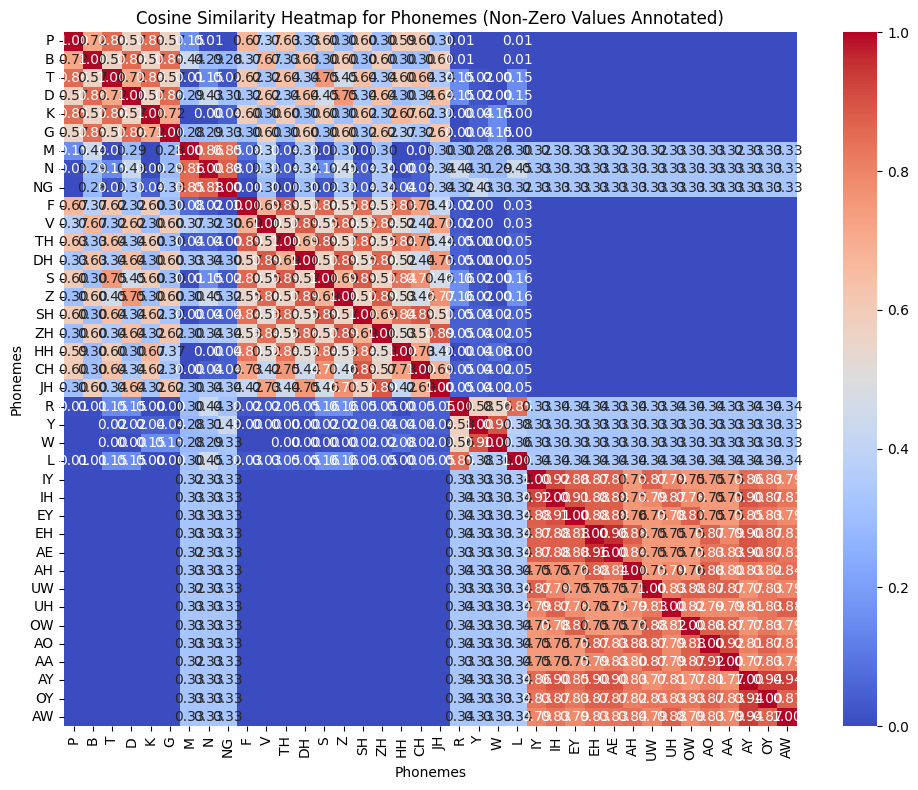

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load the CSV file
file_path = './jstrace-features-no-silence.csv'
data = pd.read_csv(file_path)

# Drop rows that are completely empty or contain missing values
data = data.dropna(how='all')

# Filter out rows where CMU equals "MISS"
data = data[data['CMU'] != 'MISS']

# Extract relevant columns for the feature vectors (from 'UNVOICE' to 'HL6B')
feature_columns = data.loc[:, 'UNVOICE':'HL6B']
phoneme_labels = data['CMU']

# Fill NaN values with zeros to avoid errors during cosine similarity calculation
feature_columns_filled = feature_columns.fillna(0)

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(feature_columns_filled)

# Convert the matrix into a DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=phoneme_labels, columns=phoneme_labels)

# Save the matrix to a CSV file
cosine_sim_df.to_csv('cosine_similarity_matrix.csv')

# Display the similarity matrix
# print(cosine_sim_df)

# Create a copy of the dataframe with empty strings where values are zero, and values where they're non-zero
annot = cosine_sim_df.applymap(lambda x: f"{x:.2f}" if x != 0 else "")

# Create the heatmap plot with non-zero annotations only
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=annot, cmap='coolwarm', fmt="", cbar=True)

# Set plot labels
plt.title("Cosine Similarity Heatmap for Phonemes (Non-Zero Values Annotated)")
plt.xlabel("Phonemes")
plt.ylabel("Phonemes")

# Display the plot
plt.tight_layout()
plt.show()

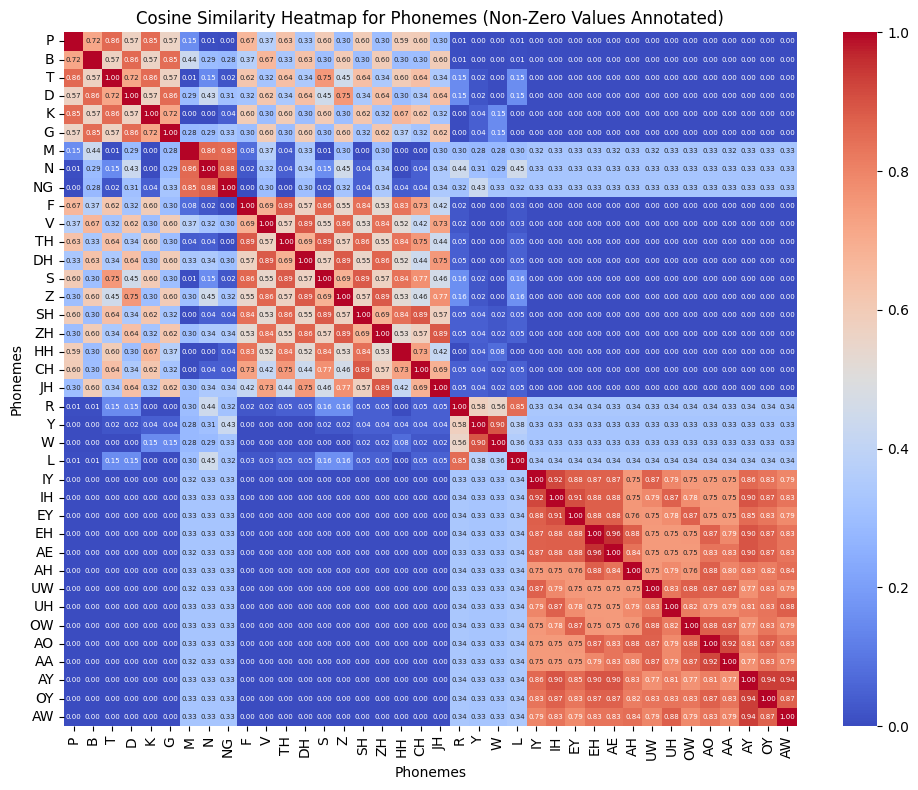

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load the CSV file
file_path = 'jstrace-features-no-silence.csv'
data = pd.read_csv(file_path)

# Drop rows that are completely empty or contain missing values
data = data.dropna(how='all')

# Filter out rows where CMU equals "MISS"
data_filtered = data[data['CMU'] != 'MISS']

# Extract relevant columns for the feature vectors (from 'UNVOICE' to 'HL6B')
feature_columns = data_filtered.loc[:, 'UNVOICE':'HL6B']
phoneme_labels = data_filtered['CMU']

# Fill NaN values with zeros to avoid errors during cosine similarity calculation
feature_columns_filled = feature_columns.fillna(0)

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(feature_columns_filled)

# Convert the matrix into a DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=phoneme_labels, columns=phoneme_labels)

# Create a mask for the annotations, using map to suppress zeros
annot = cosine_sim_df.map(lambda x: f"{x:.2f}" if x != (0 or 1) else "")

# Create the heatmap plot with non-zero annotations only
plt.figure(figsize=(10, 8))
# sns.heatmap(cosine_sim_df, annot=annot, cmap='coolwarm', fmt="", cbar=True)
sns.heatmap(cosine_sim_df, annot=annot, cmap='coolwarm', fmt="", cbar=True, annot_kws={"size": 5})  # Adjust the "size" value as needed

# Set plot labels
plt.title("Cosine Similarity Heatmap for Phonemes (Non-Zero Values Annotated)")
plt.xlabel("Phonemes")
plt.ylabel("Phonemes")

# Display the plot
plt.tight_layout()
plt.show()


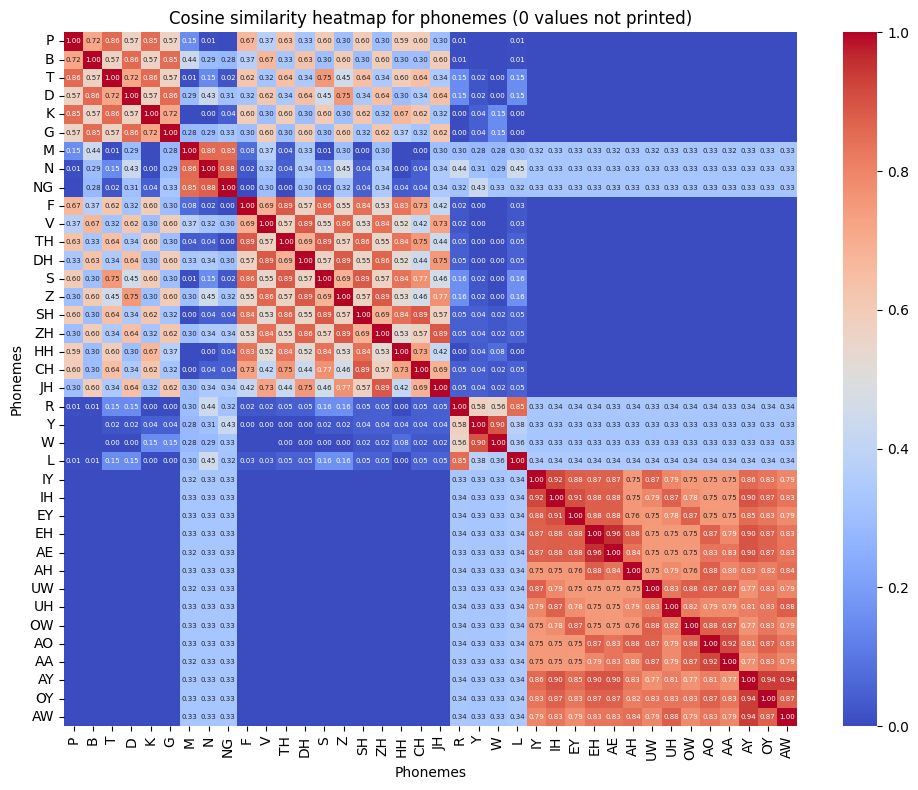

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load the CSV file
file_path = 'jstrace-features-no-silence.csv'
data = pd.read_csv(file_path)

# Drop rows that are completely empty or contain missing values
data = data.dropna(how='all')

# Filter out rows where CMU equals "MISS"
data_filtered = data[data['CMU'] != 'MISS']

# Extract relevant columns for the feature vectors (from 'UNVOICE' to 'HL6B')
feature_columns = data_filtered.loc[:, 'UNVOICE':'HL6B']
phoneme_labels = data_filtered['CMU']

# Fill NaN values with zeros to avoid errors during cosine similarity calculation
feature_columns_filled = feature_columns.fillna(0)

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(feature_columns_filled)

# Convert the matrix into a DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=phoneme_labels, columns=phoneme_labels)

# Create a mask for the annotations, using map to suppress zeros
annot = cosine_sim_df.map(lambda x: f"{x:.2f}" if x != 0 else "")

# Create the heatmap plot with non-zero annotations only
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=annot, cmap='coolwarm', fmt="", cbar=True, annot_kws={"size": 5})  # Adjust the "size" value as needed

# Set plot labels
plt.title("Cosine similarity heatmap for phonemes (0 values not printed)")
plt.xlabel("Phonemes")
plt.ylabel("Phonemes")

# Display the plot
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

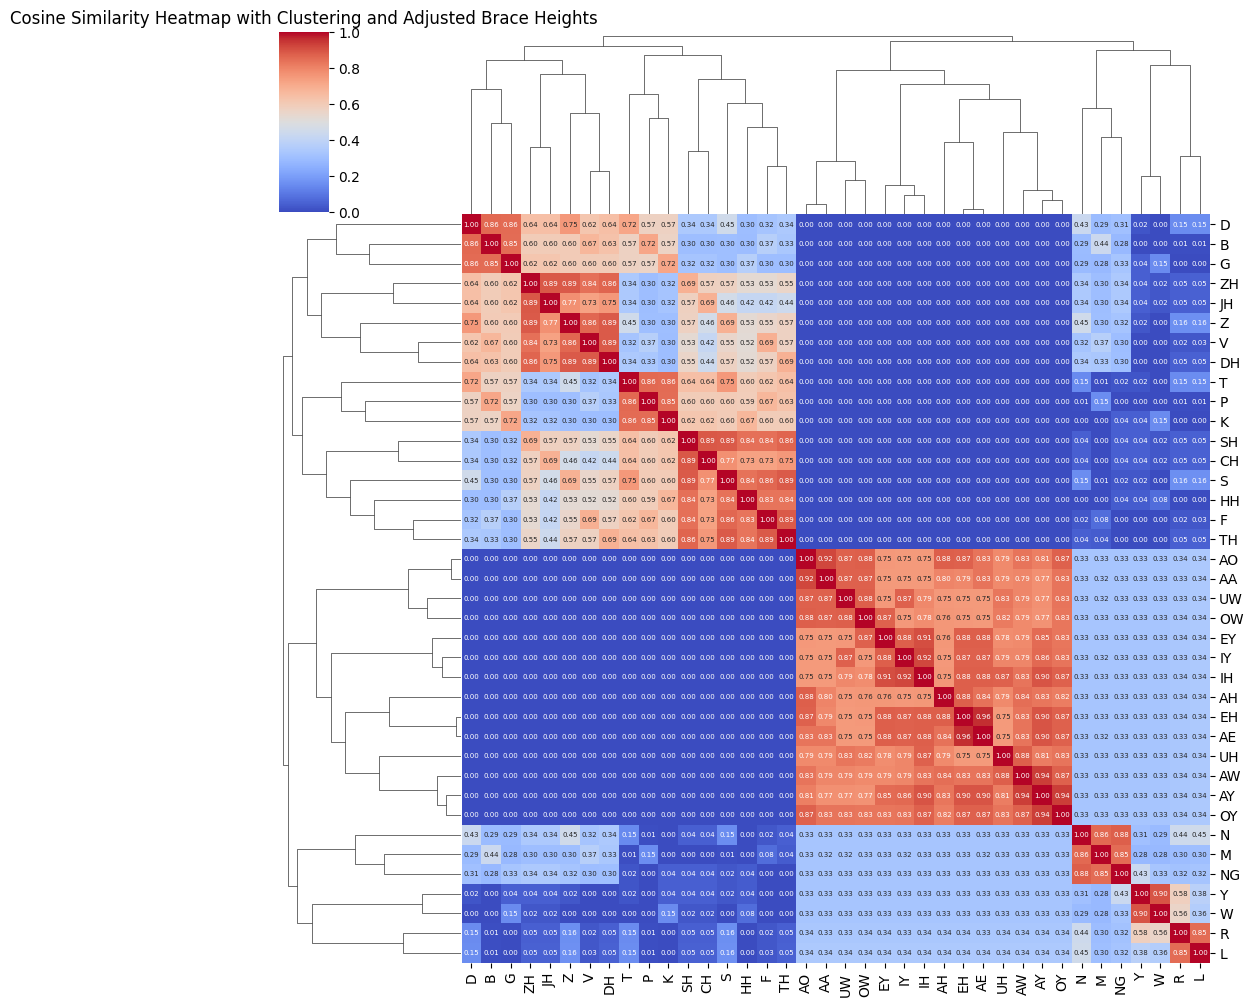

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# Load the CSV file
file_path = 'jstrace-features-no-silence.csv'
data = pd.read_csv(file_path)

# Drop rows that are completely empty or contain missing values
data = data.dropna(how='all')

# Filter out rows where CMU equals "MISS"
data_filtered = data[data['CMU'] != 'MISS']

# Extract relevant columns for the feature vectors (from 'UNVOICE' to 'HL6B')
feature_columns = data_filtered.loc[:, 'UNVOICE':'HL6B']
phoneme_labels = data_filtered['CMU']

# Fill NaN values with zeros to avoid errors during cosine similarity calculation
feature_columns_filled = feature_columns.fillna(0)

# Compute the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(feature_columns_filled)

# Perform hierarchical clustering on the similarity matrix using Ward's method
Z = linkage(cosine_sim_matrix, method='ward')

# Adjust the height of the dendrogram by manually modifying the 'dcoord' in the dendrogram
def force_brace_height(Z, min_distance=10):
    """
    Adjust the dendrogram linkage matrix so that every level of braces extends by a fixed amount.
    :param Z: Linkage matrix
    :param min_distance: The additional height in pixels to force at each level.
    :return: Adjusted linkage matrix.
    """
    # For each merge, adjust the height of the merge (Z[:, 2] is the height)
    max_height = np.max(Z[:, 2])  # Max height (the highest brace)
    current_height = 0
    adjusted_heights = []

    for i, merge_height in enumerate(Z[:, 2]):
        # For each height, add min_distance to the previous height
        current_height += min_distance
        adjusted_heights.append(current_height)

    Z[:, 2] = adjusted_heights
    return Z

# Apply the custom brace height adjustment
Z_adjusted = force_brace_height(Z, min_distance=10)

# Plot a heatmap with clustering using Seaborn's clustermap
plt.figure(figsize=(10, 8))

# Create the clustermap with the adjusted linkage matrix
sns.clustermap(
    cosine_sim_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    cbar=True, 
    row_linkage=Z_adjusted,  # Use the adjusted linkage matrix
    col_linkage=Z_adjusted,  # Use the adjusted linkage matrix for columns too
    figsize=(10, 10),
    xticklabels=phoneme_labels,
    yticklabels=phoneme_labels,
    annot_kws={"size": 5}
)

# Set the title
plt.title("Cosine Similarity Heatmap with Clustering and Adjusted Brace Heights")

# Show the plot
plt.show()
